In [1]:
conda install -c conda -forge/label/cf202003 pandas-profiling


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py install [-h] [--revision REVISION]
                               [-n ENVIRONMENT | -p PATH] [-c CHANNEL]
                               [--use-local] [--override-channels]
                               [--repodata-fn REPODATA_FNS]
                               [--strict-channel-priority]
                               [--no-channel-priority]
                               [--no-deps | --only-deps] [--no-pin] [--copy]
                               [--no-shortcuts] [-C] [-k] [--offline] [-d]
                               [--json] [-q] [-v] [-y] [--download-only]
                               [--show-channel-urls] [--file FILE]
                               [--force-reinstall]
                               [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                               [-m] [--clobber] [--dev]
                               [package_spec [package_spec ...]]
conda-script.py install: error: argument -f/--force: ignored 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
import copy
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
#ProfileReport(df)

In [9]:
weather = df.set_index('Date')
weather

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [10]:
C_features = weather.select_dtypes(include = ['object']).copy()
C_features

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Date,,,,,,
2008-12-01,Albury,W,W,WNW,No,No
2008-12-02,Albury,WNW,NNW,WSW,No,No
2008-12-03,Albury,WSW,W,WSW,No,No
2008-12-04,Albury,NE,SE,E,No,No
2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
2017-06-21,Uluru,E,SE,ENE,No,No
2017-06-22,Uluru,NNW,SE,N,No,No
2017-06-23,Uluru,N,SE,WNW,No,No


In [11]:
C_features.isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [47]:
cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for i in cols:
    mode_val = C_features[i].mode()[0]
    C_features[i].fillna(mode_val, inplace = True)

In [45]:
C_features

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Location_n,WindGustDir_n,WindDir9am_n,WindDir3pm_n,RainToday_n,RainTomorrow_n
Date,,,,,,,,,,,,
2008-12-01,Albury,W,W,WNW,No,No,2,13,13,14,0,0
2008-12-02,Albury,WNW,NNW,WSW,No,No,2,14,6,15,0,0
2008-12-03,Albury,WSW,W,WSW,No,No,2,15,13,15,0,0
2008-12-04,Albury,NE,SE,E,No,No,2,4,9,0,0,0
2008-12-05,Albury,W,ENE,NW,No,No,2,13,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,E,SE,ENE,No,No,41,0,9,1,0,0
2017-06-22,Uluru,NNW,SE,N,No,No,41,6,9,3,0,0
2017-06-23,Uluru,N,SE,WNW,No,No,41,3,9,14,0,0


In [46]:
C_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Location        145460 non-null  object
 1   WindGustDir     145460 non-null  object
 2   WindDir9am      145460 non-null  object
 3   WindDir3pm      145460 non-null  object
 4   RainToday       145460 non-null  object
 5   RainTomorrow    145460 non-null  object
 6   Location_n      145460 non-null  int32 
 7   WindGustDir_n   145460 non-null  int32 
 8   WindDir9am_n    145460 non-null  int32 
 9   WindDir3pm_n    145460 non-null  int32 
 10  RainToday_n     145460 non-null  int32 
 11  RainTomorrow_n  145460 non-null  int32 
dtypes: int32(6), object(6)
memory usage: 15.1+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder
le_Location = LabelEncoder()
le_WindGustDir = LabelEncoder()
le_WindDir9am = LabelEncoder()
le_WindDir3pm = LabelEncoder()
le_RainToday = LabelEncoder()
le_RainTomorrow = LabelEncoder()

In [16]:
C_features['Location_n'] = le_Location.fit_transform(C_features['Location'])
C_features['WindGustDir_n'] = le_WindGustDir.fit_transform(C_features['WindGustDir'])
C_features['WindDir9am_n'] = le_WindDir9am.fit_transform(C_features['WindDir9am'])
C_features['WindDir3pm_n'] = le_WindDir3pm.fit_transform(C_features['WindDir3pm'])
C_features['RainToday_n'] = le_RainToday.fit_transform(C_features['RainToday'])
C_features['RainTomorrow_n'] = le_RainTomorrow.fit_transform(C_features['RainTomorrow'])

In [17]:
C_features

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Location_n,WindGustDir_n,WindDir9am_n,WindDir3pm_n,RainToday_n,RainTomorrow_n
Date,,,,,,,,,,,,
2008-12-01,Albury,W,W,WNW,No,No,2,13,13,14,0,0
2008-12-02,Albury,WNW,NNW,WSW,No,No,2,14,6,15,0,0
2008-12-03,Albury,WSW,W,WSW,No,No,2,15,13,15,0,0
2008-12-04,Albury,NE,SE,E,No,No,2,4,9,0,0,0
2008-12-05,Albury,W,ENE,NW,No,No,2,13,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,E,SE,ENE,No,No,41,0,9,1,0,0
2017-06-22,Uluru,NNW,SE,N,No,No,41,6,9,3,0,0
2017-06-23,Uluru,N,SE,WNW,No,No,41,3,9,14,0,0


In [18]:
new_C_features = C_features.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'],axis='columns')
new_C_features

,Location_n,WindGustDir_n,WindDir9am_n,WindDir3pm_n,RainToday_n,RainTomorrow_n
Date,,,,,,
2008-12-01,2,13,13,14,0,0
2008-12-02,2,14,6,15,0,0
2008-12-03,2,15,13,15,0,0
2008-12-04,2,4,9,0,0,0
2008-12-05,2,13,1,7,0,0
...,...,...,...,...,...,...
2017-06-21,41,0,9,1,0,0
2017-06-22,41,6,9,3,0,0
2017-06-23,41,3,9,14,0,0


<AxesSubplot:xlabel='RainTomorrow_n', ylabel='count'>

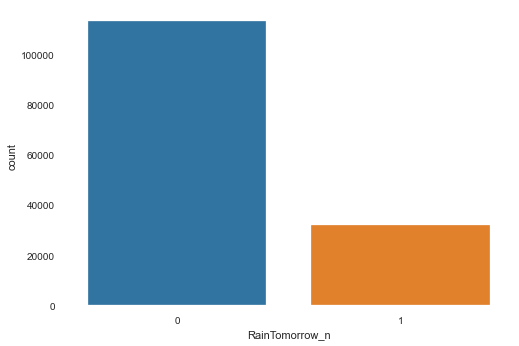

In [19]:
#C_features['RainTomorrow_n'].value_counts().plot(kind = 'bar')
sns.countplot(x = C_features['RainTomorrow_n'])

In [20]:
N_features = weather.select_dtypes(include = ['float64']).copy()
N_features

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
2017-06-22,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
2017-06-23,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1


In [21]:
N_features.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [22]:
Ncols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
for i in Ncols:
    Q1 = weather[Ncols].quantile(0.25)
    Q3 = weather[Ncols].quantile(0.75)
    IQR = Q3 - Q1
print(IQR)

MinTemp           9.3
MaxTemp          10.3
Rainfall          0.8
Evaporation       4.8
Sunshine          5.8
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.5
Pressure3pm       9.6
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.8
dtype: float64


In [23]:
(weather[Ncols] < (Q1 - 1.5 * IQR)) | (weather[Ncols] > (Q3 + 1.5 * IQR))

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,,,,
2008-12-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-12-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-12-03,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-12-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-12-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-06-22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-06-23,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
new_N_features = N_features[~((N_features < (Q1 - 1.5 * IQR)) | (N_features > (Q3 + 1.5 * IQR))).any(axis = 1)]
#new_N_features.shape

In [25]:
for i in Ncols:
    mean_val = N_features[i].mean()
    N_features[i].fillna(mean_val, inplace = True)

In [26]:
N_features

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
2008-12-02,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2008-12-03,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
2008-12-04,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
2008-12-05,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4
2017-06-22,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5
2017-06-23,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1


In [27]:
N_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
dtypes: float64(16)
memory usage: 22.9+ MB


In [50]:
weather.groupby('RainTomorrow').mean().T

RainTomorrow,No,Yes
MinTemp,11.897675,13.186890
MaxTemp,23.836247,21.119100
Rainfall,1.270290,6.142104
Evaporation,5.734807,4.527779
Sunshine,8.546358,4.471761
WindGustSpeed,38.288391,45.946764
WindSpeed9am,13.567314,15.508577
WindSpeed3pm,18.222804,20.078509
Humidity9am,66.217573,77.983314
Humidity3pm,46.510625,68.800019


In [29]:
new_weather = pd.concat([new_C_features, N_features], axis = 1)
#new_weather

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

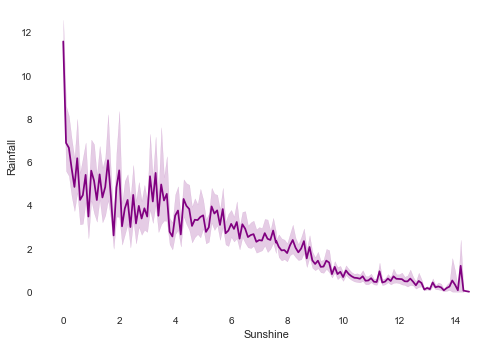

In [30]:
sns.lineplot(data = new_weather, x = 'Sunshine', y ='Rainfall', color = 'purple')

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

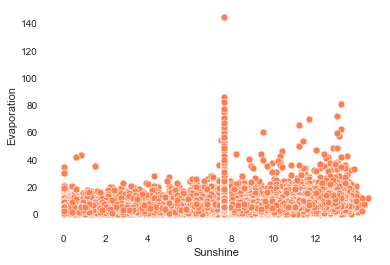

In [54]:
sns.scatterplot(data = new_weather, x = 'Sunshine', y = 'Evaporation', color = 'coral')

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

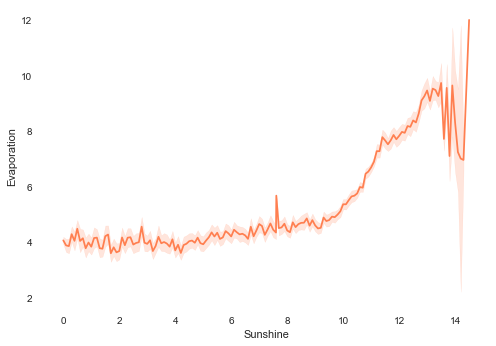

In [31]:
sns.lineplot(data = new_weather, x = 'Sunshine', y ='Evaporation', color = 'coral')

<AxesSubplot:>

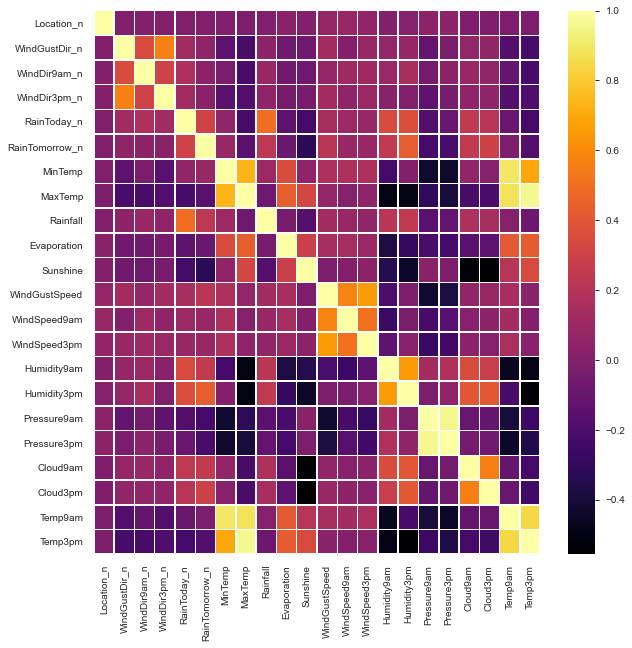

In [32]:
plt.figure(figsize = (10, 10))
sns.heatmap(new_weather.corr(), linewidths = 0.5, annot = False, fmt = '.2f', cmap = 'inferno')

In [33]:
X = new_weather.drop(['RainTomorrow_n'], axis = 1)
#X

In [34]:
y = new_weather['RainTomorrow_n']
#y

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)#, random_state = 42)

In [36]:
from sklearn.tree import DecisionTreeClassifier
Dmodel = DecisionTreeClassifier()

In [37]:
Dmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_predicted = Dmodel.predict(X_test)
y_predicted

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
y_test

Date
2016-12-02    0
2011-11-08    1
2017-03-17    0
2015-06-21    1
2012-01-24    1
             ..
2009-05-24    0
2009-09-03    0
2015-08-23    1
2009-09-16    1
2017-01-08    0
Name: RainTomorrow_n, Length: 29092, dtype: int32

In [40]:
from sklearn import metrics

In [41]:
metrics.accuracy_score(y_test, y_predicted)

0.7853018011824556

In [42]:
metrics.f1_score(y_test, y_predicted)

0.5190204835977206